# Deep Learning

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [5]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [6]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 1119 samples, validate on 480 samples
Epoch 1/200
1119/1119 [==============================] - 3s 2ms/sample - loss: 42.9808 - mse: 42.9808 - val_loss: 37.9187 - val_mse: 37.9187
Epoch 2/200
1119/1119 [==============================] - 0s 104us/sample - loss: 38.6981 - mse: 38.6981 - val_loss: 35.6697 - val_mse: 35.6697
Epoch 3/200
1119/1119 [==============================] - 0s 171us/sample - loss: 35.3588 - mse: 35.3588 - val_loss: 33.7521 - val_mse: 33.7521
Epoch 4/200
1119/1119 [==============================] - ETA: 0s - loss: 33.0723 - mse: 33.072 - 0s 230us/sample - loss: 32.5930 - mse: 32.5930 - val_loss: 32.0218 - val_mse: 32.0218
Epoch 5/200
1119/1119 [==============================] - 0s 250us/sample - loss: 30.1656 - mse: 30.1656 - val_loss: 30.4066 - val_mse: 30.4066
Epoch 6/200
1119/1119 [==============================] - 0s 124us/sample - loss: 27.9642 - mse: 27.9642 - val_loss: 28.8283 - val_mse: 28.8283
Epoch 7/200
1119/1119 [==============================] - 

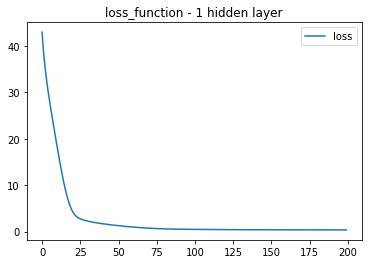

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [8]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 1119 samples, validate on 480 samples
Epoch 1/200
1119/1119 [==============================] - 2s 2ms/sample - loss: 28.4421 - mse: 28.4421 - val_loss: 27.6854 - val_mse: 27.6854
Epoch 2/200
1119/1119 [==============================] - 0s 130us/sample - loss: 24.5431 - mse: 24.5431 - val_loss: 23.8623 - val_mse: 23.8623
Epoch 3/200
1119/1119 [==============================] - 0s 225us/sample - loss: 19.8834 - mse: 19.8834 - val_loss: 19.2156 - val_mse: 19.2156
Epoch 4/200
1119/1119 [==============================] - 0s 187us/sample - loss: 14.7587 - mse: 14.7587 - val_loss: 14.2241 - val_mse: 14.2241
Epoch 5/200
1119/1119 [==============================] - 0s 144us/sample - loss: 10.1999 - mse: 10.1999 - val_loss: 9.7261 - val_mse: 9.7261
Epoch 6/200
1119/1119 [==============================] - 0s 290us/sample - loss: 7.0587 - mse: 7.0587 - val_loss: 6.3733 - val_mse: 6.3733
Epoch 7/200
1119/1119 [==============================] - 0s 201us/sample - loss: 5.1165 - mse: 5.1165 -

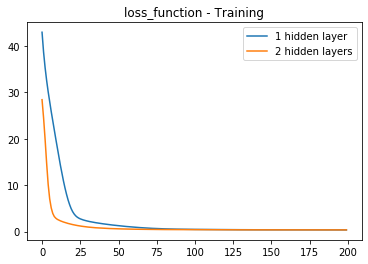

In [10]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

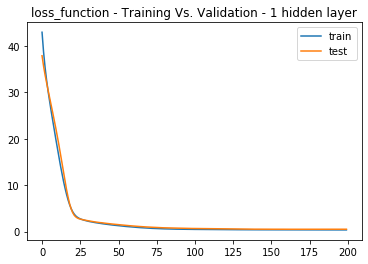

In [11]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

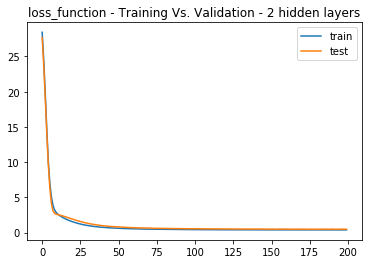

In [12]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()